In [1]:
import pandas as pd

In [14]:
A=pd.read_csv('A_lvr_land_A.csv')
B=pd.read_csv('B_lvr_land_A.csv')
E=pd.read_csv('E_lvr_land_A.csv')
F=pd.read_csv('F_lvr_land_A.csv')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
#2.刪除csv中第二列英文翻譯
df_A = A.drop(0)
df_B = B.drop(0)
df_E = E.drop(0)
df_F = F.drop(0)

In [21]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
df_A['city']='台北市Taipei'
df_F['city']='新北市New Taipei'
df_B['city']='台中市Taichung'
df_E['city']='高雄市Kaohsiung'

In [27]:
#4. 將以上四份資料運用pd.concat()串接
alll=pd.concat([df_A, df_F, df_B, df_E])

In [25]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [30]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
alll_name=alll.rename(columns={'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'})

In [45]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
new=alll_name.loc[(alll_name.main_use=="住家用")&(alll_name.use_zoning=="住"),['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']]
AA=new.dropna()
AA

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number
1,台北市Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583,3,2,2
2,台北市Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558,2,1,1
5,台北市Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825,3,2,2
7,台北市Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386,3,1,2
8,台北市Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
11925,高雄市Kaohsiung,路竹區,住家用,住,5300000,140.10999999999999,86.24,1090718,37827,3,2,2
12019,高雄市Kaohsiung,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885,3,2,2
12236,高雄市Kaohsiung,茄萣區,住家用,住,2720000,210.78,144.40,1090725,12904,5,2,3
12284,高雄市Kaohsiung,路竹區,住家用,住,4950000,94.48,94.48,1090726,52392,3,2,2


In [49]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
AAA=AA.astype({'total_price':'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'})
AAA

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number
1,台北市Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2
2,台北市Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1
5,台北市Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2
7,台北市Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2
8,台北市Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
11925,高雄市Kaohsiung,路竹區,住家用,住,5300000,140.11,86.24,1090718,37827.0,3,2,2
12019,高雄市Kaohsiung,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885.0,3,2,2
12236,高雄市Kaohsiung,茄萣區,住家用,住,2720000,210.78,144.40,1090725,12904.0,5,2,3
12284,高雄市Kaohsiung,路竹區,住家用,住,4950000,94.48,94.48,1090726,52392.0,3,2,2


In [68]:
#4. 做資料切片將
# 新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
# 1.交易年月日(tx_dt_year)，限制在109年
# 2.建物現況格局-房(room_number)，限制在1到5間
# 3.建物現況格局-廳(hall_number)，限制在1到2廳
# 4.最後運用.reset_index()重新定義索引
AAA['tx_dt_year'] = AAA['tx_dt'].apply(lambda x: int(x[:-4]))
AAAA=AAA.loc[(AAA.tx_dt_year==109)&(1<=AAA.room_number)&(AAA.room_number<=5)&(1<=AAA.hall_number)&(AAA.hall_number<=2)]
AAAA.reset_index(drop=True)

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,台北市Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109
1,台北市Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
2,台北市Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109
3,台北市Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
4,台北市Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,高雄市Kaohsiung,路竹區,住家用,住,3600000,80.42,80.42,1090706,44765.0,4,1,2,109
6890,高雄市Kaohsiung,路竹區,住家用,住,5300000,140.11,86.24,1090718,37827.0,3,2,2,109
6891,高雄市Kaohsiung,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885.0,3,2,2,109
6892,高雄市Kaohsiung,茄萣區,住家用,住,2720000,210.78,144.40,1090725,12904.0,5,2,3,109


In [72]:
AAAA['building_area_square_feet'] =AAAA.building_area_square_meter*0.3025
AAAA['main_building_area_square_feet'] =AAAA.main_building_area*0.3025
AAAA['unit_price_square_feet'] =AAAA.unit_price/0.3025

<ipython-input-72-2d129bb62e7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAAA['building_area_square_feet'] =AAAA.building_area_square_meter*0.3025
<ipython-input-72-2d129bb62e7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAAA['main_building_area_square_feet'] =AAAA.main_building_area*0.3025
<ipython-input-72-2d129bb62e7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [74]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
#否
AAAA.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.894000e+03,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.0,6894.000000,6894.000000,6.894000e+03
mean,1.138712e+07,121.712089,82.086667,94364.671163,2.850885,1.793299,1.733536,109.0,36.817907,24.831217,3.119493e+05
std,1.159445e+07,62.871712,37.363166,58317.311227,0.898498,0.404969,0.681085,0.0,19.018693,11.302358,1.927845e+05
min,0.000000e+00,0.970000,0.000000,0.000000,1.000000,1.000000,0.000000,109.0,0.293425,0.000000,0.000000e+00
25%,5.580000e+06,82.965000,60.682500,53532.250000,2.000000,2.000000,1.000000,109.0,25.096912,18.356456,1.769661e+05
50%,8.550000e+06,109.390000,78.990000,79610.000000,3.000000,2.000000,2.000000,109.0,33.090475,23.894475,2.631736e+05
75%,1.329500e+07,147.517500,95.797500,118728.250000,3.000000,2.000000,2.000000,109.0,44.624044,28.978744,3.924901e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,109.0,437.097375,101.567400,2.016873e+06


In [77]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
#building_area_square_meter、main_building_area、building_area_square_feet、main_building_area_square_feet
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
#unit_price
AAAA.loc[AAAA.city=='台北市Taipei'].corr()[['total_price','unit_price_square_feet']]

,total_price,unit_price_square_feet
total_price,1.000000,0.581838
building_area_square_meter,0.864785,0.221264
main_building_area,0.710934,0.117151
unit_price,0.581838,1.000000
room_number,0.324625,-0.100902
hall_number,0.269678,0.003585
health_number,0.597425,0.126603
tx_dt_year,NaN,NaN
building_area_square_feet,0.864785,0.221264
main_building_area_square_feet,0.710934,0.117151


<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='city'>

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21271 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39640 missing from current

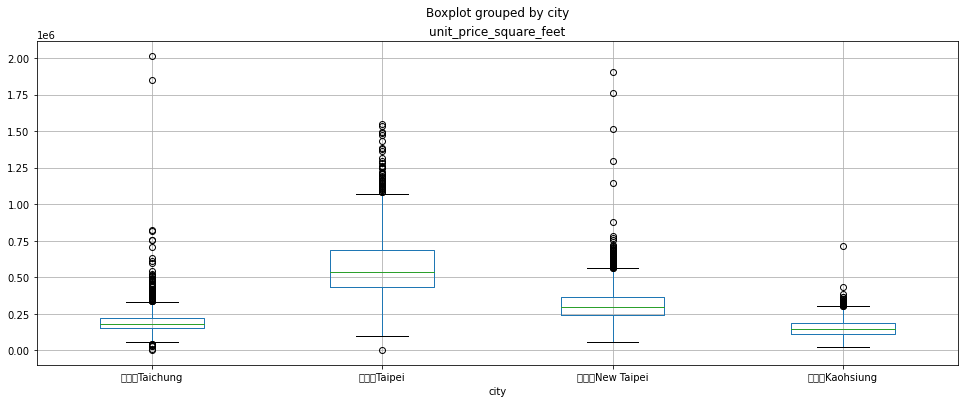

In [79]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
#台北市
AAAA.boxplot(column=['unit_price_square_feet'],by='city',figsize=(16,6))

<AxesSubplot:title={'center':'total_price'}, xlabel='room_number'>

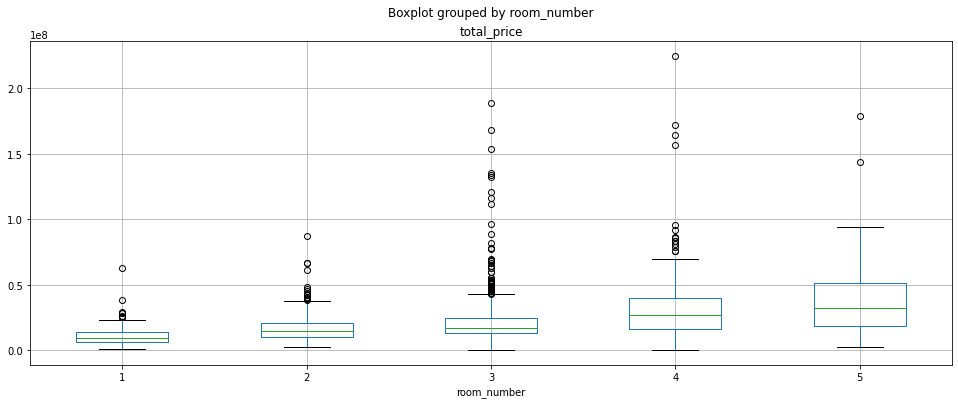

In [83]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
#5
AAAA.loc[AAAA.city=='台北市Taipei'].boxplot(column=['total_price'],by='room_number',figsize=(16,6))

In [85]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
#大安區
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(AAAA['towns'].values)
AAAA['towns_2'] = le.transform(AAAA['towns'].values)

<ipython-input-85-bd8f4423274a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAAA['towns_2'] = le.transform(AAAA['towns'].values)


<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='towns_2'>

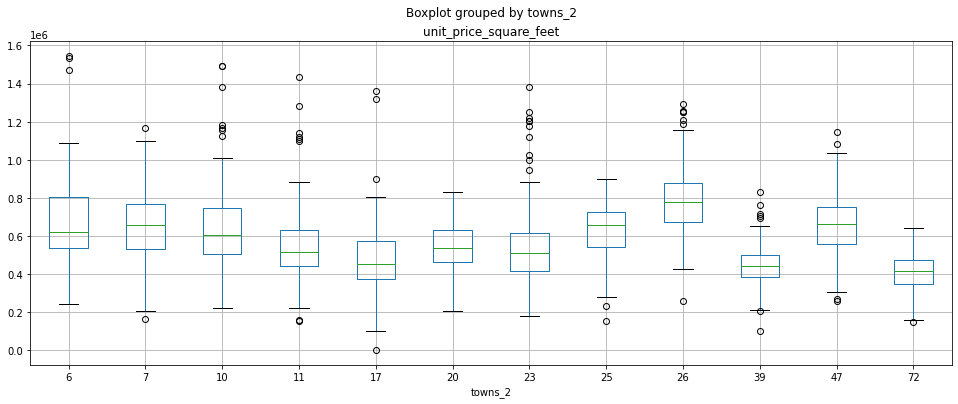

In [87]:
AAAA.loc[AAAA.city=='台北市Taipei'].boxplot(column=['unit_price_square_feet'],by='towns_2',figsize=(16,6))

In [89]:
le.inverse_transform([26])

array(['大安區'], dtype=object)